In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import warnings
import nltk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

## Wstępna eksploracja dancyh

In [2]:
df = pd.read_csv('Data/data.csv')

In [3]:
df.head(10)

,language,proj_id,file_id,file_body
0,JavaScript,10001,100001,// Functions as values of a variable\nvar cube...
1,JavaScript,10001,100002,// Functions as values of a variable\nvar cube...
2,JavaScript,10002,100003,function median(ary) {\n if (ary.length == ...
3,JavaScript,10002,100004,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n"
4,JavaScript,10002,100005,(() => {\n 'use strict';\n\n // median :...
5,JavaScript,10003,100006,"function divByZero(dividend,divisor)\n{\n\tvar..."
6,JavaScript,10004,100007,"if (""abs"" in Math) { ... }\n"
7,JavaScript,10004,100008,"if (typeof bloop !== ""undefined"") { ... }\n"
8,JavaScript,10005,100009,(function () {\n 'use strict';\n\n // di...
9,JavaScript,10005,100010,"function sort_disjoint(values, indices) {\n v..."


In [4]:
len(df)

16272

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16272 entries, 0 to 16271
Data columns (total 4 columns):
language     16272 non-null object
proj_id      16272 non-null int64
file_id      16272 non-null int64
file_body    16268 non-null object
dtypes: int64(2), object(2)
memory usage: 508.6+ KB


In [6]:
df.language.unique()

array(['JavaScript', 'Swift', 'Python', 'Java', 'C++', 'Ruby', 'Rust', 'C',
       'Scala', 'R', 'Go', 'Mathematica', 'Kotlin', 'Fortran', 'Julia',
       'PHP', 'MATLAB', 'Haskell', 'Perl'], dtype=object)

In [7]:

df.language.value_counts()

Python         1452
Haskell        1333
Perl           1136
Ruby           1104
JavaScript     1104
C              1078
Go              998
Java            987
Mathematica     927
C++             880
Scala           802
Fortran         745
Kotlin          643
Julia           638
R               603
MATLAB          544
PHP             477
Rust            417
Swift           404
Name: language, dtype: int64

[Text(0, 0, 'JavaScript'),
 Text(0, 0, 'Swift'),
 Text(0, 0, 'Python'),
 Text(0, 0, 'Java'),
 Text(0, 0, 'C++'),
 Text(0, 0, 'Ruby'),
 Text(0, 0, 'Rust'),
 Text(0, 0, 'C'),
 Text(0, 0, 'Scala'),
 Text(0, 0, 'R'),
 Text(0, 0, 'Go'),
 Text(0, 0, 'Mathematica'),
 Text(0, 0, 'Kotlin'),
 Text(0, 0, 'Fortran'),
 Text(0, 0, 'Julia'),
 Text(0, 0, 'PHP'),
 Text(0, 0, 'MATLAB'),
 Text(0, 0, 'Haskell'),
 Text(0, 0, 'Perl')]

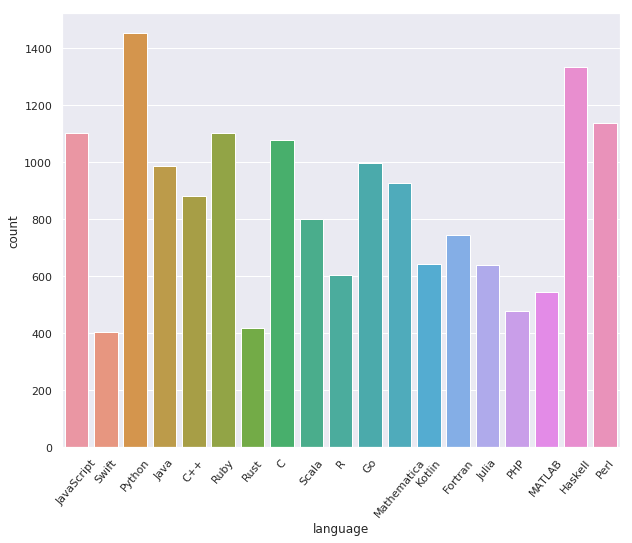

In [8]:
sns.set(rc={'figure.figsize':(10,8)})
lang_count = sns.countplot(df.language)
lang_count.set_xticklabels(lang_count.get_xticklabels(), rotation=50)

In [9]:
len(df.proj_id.unique())

10009

In [10]:
len(df.file_id.unique())

16272

In [11]:
df[df.file_body.isnull()]

,language,proj_id,file_id,file_body
1163,Swift,10518,101164,NaN
9951,Mathematica,15938,109952,NaN
12227,Julia,17632,112228,NaN
15290,Perl,19446,115291,NaN


In [12]:
df.dropna(inplace=True)

In [13]:
df.columns.values

array(['language', 'proj_id', 'file_id', 'file_body'], dtype=object)

In [14]:
df['file_body_len'] = df.apply(lambda row: len(str(row['file_body'])), axis=1)


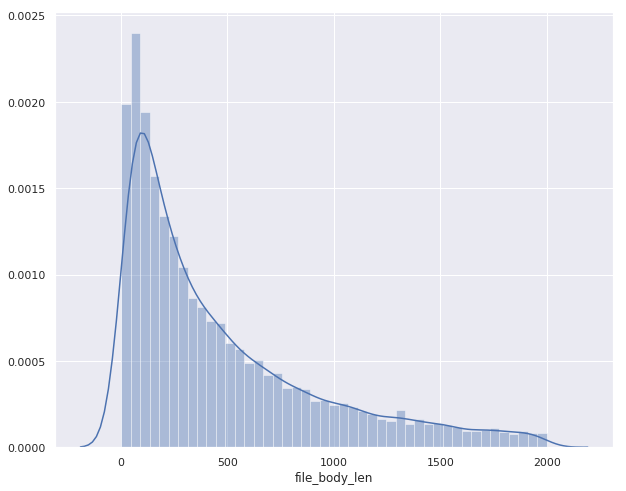

In [15]:
sns.distplot(df[df['file_body_len'] < 2000].file_body_len);

In [16]:
for body in df[df['file_body_len'] < 100].file_body.values:
    print(body)
    print("*" *15)

[
  null,
  4,
  3.5,
  2.1
]

***************
if ("abs" in Math) { ... }

***************
if (typeof bloop !== "undefined") { ... }

***************
[[1, 3, 5], [2, 4, 6]]

***************
var n = 1024;
while (n > 0) {
  print(n);
  n /= 2;
}

***************
512
256
128
64
32
16
8
4
2
1

***************
console.log("ha".repeat(5));  // hahahahaha

***************
(function f() {

    return '(' + f.toString() + ')();';

})();

***************
(function(){print("("+arguments.callee.toString().replace(/\s/g,'')+")()");})()

***************
var code='var q=String.fromCharCode(39);print("var code="+q+code+q+";eval(code)")';eval(code)

***************
var a=function () {var b="var a="+a.toString()+"\;a()";alert(b)};a()

***************
(function f() {

    console.log('(' + f.toString() + ')();');

})();

***************
(function f() {

    return '(' + f.toString() + ')();';

})();

***************
[false, true]

***************
$.get('http://rosettacode.org', function(data) {
  console

***************
a = Undefined
-> Undefined

a
-> Undefined

ValueQ[a]
-> True

***************
PalindromeQ[i_String] := StringReverse[i] == i

***************
Select[{4, 5, Pi, 2, 1.3, 7, 6, 8.0}, Mod[#, 2] == 0 &]

***************
{4, 2, 6}

***************
{4, 2, 6, 8.}

***************
Select[{4, 5, Pi, 2, 1.3, 7, 6, 8.0}, EvenQ]

***************
If[a < b, True, False]

***************
(*this is a comment*)

***************
survivor[n_, k_] := Nest[Most[RotateLeft[#, k]] &, Range[0, n - 1], n - 1]
survivor[41, 3]

***************
Map[Rationalize[#,0]&,{0.9054054,0.518518, 0.75} ]
-> {4527027/5000000,259259/500000,3/4}

***************
Cases[Range[888888877, 888888888], _?(perniciousQ@# &)]

***************
perniciousQ[n_Integer] := PrimeQ@Total@IntegerDigits[n, 2]

***************
n = 0; NestWhile[Flatten@{#, If[perniciousQ[++n], n, {}]} &, {}, Length@# < 25 &]

***************
Print["\007"]

***************
Fold[f, x, {a, b, c, d}]

***************
 Union @@ Range[0, 999, {3, 5}] /

In [17]:
df.head()

,language,proj_id,file_id,file_body,file_body_len
0,JavaScript,10001,100001,// Functions as values of a variable\nvar cube...,411
1,JavaScript,10001,100002,// Functions as values of a variable\nvar cube...,493
2,JavaScript,10002,100003,function median(ary) {\n if (ary.length == ...,400
3,JavaScript,10002,100004,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n",30
4,JavaScript,10002,100005,(() => {\n 'use strict';\n\n // median :...,1346


## Dalsza eksploracja - najczęściej występujące wyrazy

In [19]:
lang_words = df.drop(['proj_id', 'file_id', 'file_body_len'], axis=1).groupby('language')

word_freq_by_lang = nltk.probability.ConditionalFreqDist()

for language, file_body in lang_words:
    code = file_body['file_body'].str.cat(sep = ' ')
    tokens = nltk.tokenize.word_tokenize(code)
    frequency = nltk.FreqDist(tokens)
    word_freq_by_lang[language] = (frequency)

In [20]:
word_freq_by_lang['Swift']

FreqDist({'(': 4064, ')': 4063, ',': 2525, ':': 2005, '=': 1804, '}': 1678, '{': 1677, "''": 1323, '``': 1259, '[': 1206, ...})

In [21]:
word_freq_by_lang['Python']

FreqDist({')': 19353, '(': 19333, ',': 18510, ':': 8736, '=': 6990, '[': 5889, ']': 5876, '>': 5031, "'": 4959, "''": 3887, ...})

### Przed przystąpieniem do oczyszczania, sprawdźmy jaką skuteczność bedzie miał model na surowych danych

In [23]:
X = df.file_body
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df.language)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
plp_pipeline = Pipeline([
    ('cv', CountVectorizer(analyzer='word')),
    ('rfc', RandomForestClassifier()),
#     ('lr', LogisticRegression()),
#     ('mnb', MultinomialNB()),    
                        ])

In [26]:
plp_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [27]:
cross_val_score(plp_pipeline, X_test, y_test, cv=5, scoring='accuracy')

array([ 0.76783005,  0.76875957,  0.73497689,  0.77006173,  0.73953488])

## Oczyszczanie tekstu file_body

In [29]:
first_text = df.file_body.values[0]
print(first_text)

// Functions as values of a variable
var cube = x => Math.pow(x, 3);

var cuberoot = x => Math.pow(x, 1 / 3);


// Higher order function
var compose = (f, g) => (x => f(g(x)));

// Storing functions in a array
var fun = [ Math.sin, Math.cos, cube ];
var inv = [ Math.asin, Math.acos, cuberoot ];

for (var i = 0; i < 3; i++) {
  // Applying the composition to 0.5
  console.log(compose(inv[i], fun[i])(0.5));
}



In [30]:
text_remove_digits = ''.join([i for i in first_text if not i.isdigit()])
text_remove_digits

'// Functions as values of a variable\nvar cube = x => Math.pow(x, );\n\nvar cuberoot = x => Math.pow(x,  / );\n\n\n// Higher order function\nvar compose = (f, g) => (x => f(g(x)));\n\n// Storing functions in a array\nvar fun = [ Math.sin, Math.cos, cube ];\nvar inv = [ Math.asin, Math.acos, cuberoot ];\n\nfor (var i = ; i < ; i++) {\n  // Applying the composition to .\n  console.log(compose(inv[i], fun[i])(.));\n}\n'

In [31]:
tokenizer = RegexpTokenizer(r'\w+')
first_text_list = tokenizer.tokenize(text_remove_digits)
print(first_text_list)

['Functions', 'as', 'values', 'of', 'a', 'variable', 'var', 'cube', 'x', 'Math', 'pow', 'x', 'var', 'cuberoot', 'x', 'Math', 'pow', 'x', 'Higher', 'order', 'function', 'var', 'compose', 'f', 'g', 'x', 'f', 'g', 'x', 'Storing', 'functions', 'in', 'a', 'array', 'var', 'fun', 'Math', 'sin', 'Math', 'cos', 'cube', 'var', 'inv', 'Math', 'asin', 'Math', 'acos', 'cuberoot', 'for', 'var', 'i', 'i', 'i', 'Applying', 'the', 'composition', 'to', 'console', 'log', 'compose', 'inv', 'i', 'fun', 'i']


In [32]:
stopwords = nltk.corpus.stopwords.words('english')

In [33]:
result_string = [word for word in first_text_list if word.lower() not in stopwords]
print(result_string)

['Functions', 'values', 'variable', 'var', 'cube', 'x', 'Math', 'pow', 'x', 'var', 'cuberoot', 'x', 'Math', 'pow', 'x', 'Higher', 'order', 'function', 'var', 'compose', 'f', 'g', 'x', 'f', 'g', 'x', 'Storing', 'functions', 'array', 'var', 'fun', 'Math', 'sin', 'Math', 'cos', 'cube', 'var', 'inv', 'Math', 'asin', 'Math', 'acos', 'cuberoot', 'var', 'Applying', 'composition', 'console', 'log', 'compose', 'inv', 'fun']


### złożenie powyższych kroków w funkcję

In [36]:
def clean_text(text):
    first_text = text
    text_remove_digits = ''.join([i for i in first_text if not i.isdigit()])
    tokenizer = RegexpTokenizer(r'\w+')
    first_text_list = tokenizer.tokenize(text_remove_digits)
    stopwords = nltk.corpus.stopwords.words('english')
    result_string = [word for word in first_text_list if word.lower() not in stopwords]
    return result_string

Z oczyszczonym tekstem sprawdzamy jeszcze raz dokładość modelu(np. z parametrem, ngram_range=(1 3)), na tej podstawie podjęcie dalszych decyzji co do oczyszczania tekstu, użycia innego algorytmu.

Do zrobienia:

W finalnej implementacji dla krótkich plików(file_body) w projekcie składającym się z wielu plików(proj_id) można by było przyjąć język programowania dla najdłuższego pliku.

Rozważyć czy sensowne jest usuwanie tekstu po znaku komentarza w danym języku (-pracochłonne)

Sprawdzić najczęstsze słowa w podobnych składniowo językach(np. C/C++)




